<a href="https://colab.research.google.com/github/profanup/RLab/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Science Project**


For our analysis and the R programming, we will make use of the following R packages:



In [1]:
library(dplyr)   # Easy data cleaning, and the very convenient pipe operator <
library(ggplot2) # Beautiful plots
library(mgcv)    # Package to fit generalized additive models


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: nlme


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


This is mgcv 1.8-35. For overview type 'help("mgcv-package")'.



**A basic data science project consists of the following six steps:**

 

1.   **State the problem** you are trying to solve. It has to be an unambiguous question that can be answered with data and a statistical or machine learning model. At least, specify: What is being observed? What has to be predicted?

2.   **Collect the data**, then clean and prepare it. This is commonly the most time-consuming task, but it has to be done in order to fit a prediction model with the data.

3.   **Explore the data.** Get to know its properties and quirks. Check numerical summaries of your metric variables, tables of the categorical data, and plot univariate and multivariate representations of your variables. By this, you also get an overview of the quality of the data and can find outliers.

4.   **Check if any variables may need to be transformed.** Most commonly, this is a logarithmic transformation of skewed measurements such as concentrations or times. Also, some variables might have to be split up into two or more variables.

5.  **Choose a model and train it on the data.** If you have more than one candidate model, apply each and evaluate their goodness-of-fit using independent data that was not used for training the model.

6.  **Use the best model to make your final predictions.**

In [64]:
data(rivers)
ls()

[1] "avgpm25"     "awake_only"  "filename"    "msleep"      "msleep10"   
 [6] "msleep5"     "mtcars"      "mtcars_data" "plants_data" "rivers"     
[11] "sleepData"   "url"

In [63]:
data()

In [69]:
summary(rivers)
sd(rivers)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  135.0   310.0   425.0   591.2   680.0  3710.0 

[1] 493.8708

In [66]:
dim(rivers)

NULL

In [14]:
getwd()
dir()

[1] "/content"

[1] "avgpm25.csv" "sample_data"

In [16]:
avgpm25<-read.csv('avgpm25.csv')
class(avgpm25)
dim(avgpm25)

[1] "data.frame"

[1] 576   5

In [25]:
str(avgpm25)

'data.frame':	576 obs. of  5 variables:
 $ pm25     : num  9.77 9.99 10.69 11.34 12.12 ...
 $ fips     : int  1003 1027 1033 1049 1055 1069 1073 1089 1097 1103 ...
 $ region   : chr  "east" "east" "east" "east" ...
 $ longitude: num  -87.7 -85.8 -87.7 -85.8 -86 ...
 $ latitude : num  30.6 33.3 34.7 34.5 34 ...


< table of extent 0 >

In [26]:
nrow(avgpm25)
ncol(avgpm25)
object.size(avgpm25)
names(avgpm25)
head(avgpm25)
summary(avgpm25)
table(avgpm25$region)

[1] 576

[1] 5

22088 bytes

[1] "pm25"      "fips"      "region"    "longitude" "latitude"

,pm25,fips,region,longitude,latitude
,<dbl>,<int>,<chr>,<dbl>,<dbl>
1,9.771185,1003,east,-87.74826,30.59278
2,9.993817,1027,east,-85.84286,33.26581
3,10.688618,1033,east,-87.72596,34.73148
4,11.337424,1049,east,-85.79892,34.45913
5,12.119764,1055,east,-86.03212,34.01860
6,10.827805,1069,east,-85.35039,31.18973


      pm25             fips          region            longitude      
 Min.   : 3.383   Min.   : 1003   Length:576         Min.   :-158.04  
 1st Qu.: 8.549   1st Qu.:16038   Class :character   1st Qu.: -97.38  
 Median :10.047   Median :28034   Mode  :character   Median : -87.37  
 Mean   : 9.836   Mean   :28431                      Mean   : -91.65  
 3rd Qu.:11.356   3rd Qu.:41045                      3rd Qu.: -80.72  
 Max.   :18.441   Max.   :56039                      Max.   : -68.26  
    latitude    
 Min.   :19.68  
 1st Qu.:35.30  
 Median :39.09  
 Mean   :38.56  
 3rd Qu.:41.75  
 Max.   :64.82  


east west 
 442  134 

In [31]:
install.packages('downloader')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [32]:
library(downloader)


In [41]:
url <- "https://raw.githubusercontent.com/genomicsclass/dagdata/master/inst/extdata/msleep_ggplot2.csv"
filename <- "msleep_ggplot2.csv"
if (!file.exists(filename)) download(url,filename)
msleep <- read.csv("msleep_ggplot2.csv")

In [34]:
names(msleep)

[1] "name"         "genus"        "vore"         "order"        "conservation"
 [6] "sleep_total"  "sleep_rem"    "sleep_cycle"  "awake"        "brainwt"     
[11] "bodywt"

In [43]:
head(msleep,2)
tail(msleep,2)

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NA,NA,11.9,NA,50.00
2,Owl monkey,Aotus,omni,Primates,NA,17.0,1.8,NA,7.0,0.0155,0.48


,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
82,Arctic fox,Vulpes,carni,Carnivora,NA,12.5,NA,NA,11.5,0.0445,3.38
83,Red fox,Vulpes,carni,Carnivora,NA,9.8,2.4,0.35,14.2,0.0504,4.23


In [44]:
str(msleep)

'data.frame':	83 obs. of  11 variables:
 $ name        : chr  "Cheetah" "Owl monkey" "Mountain beaver" "Greater short-tailed shrew" ...
 $ genus       : chr  "Acinonyx" "Aotus" "Aplodontia" "Blarina" ...
 $ vore        : chr  "carni" "omni" "herbi" "omni" ...
 $ order       : chr  "Carnivora" "Primates" "Rodentia" "Soricomorpha" ...
 $ conservation: chr  "lc" NA "nt" "lc" ...
 $ sleep_total : num  12.1 17 14.4 14.9 4 14.4 8.7 7 10.1 3 ...
 $ sleep_rem   : num  NA 1.8 2.4 2.3 0.7 2.2 1.4 NA 2.9 NA ...
 $ sleep_cycle : num  NA NA NA 0.133 0.667 ...
 $ awake       : num  11.9 7 9.6 9.1 20 9.6 15.3 17 13.9 21 ...
 $ brainwt     : num  NA 0.0155 NA 0.00029 0.423 NA NA NA 0.07 0.0982 ...
 $ bodywt      : num  50 0.48 1.35 0.019 600 ...


In [49]:
awake_only<-msleep$awake
head(awake_only,20)
summary(msleep$awake)
table(msleep$conservation)

[1] 11.9  7.0  9.6  9.1 20.0  9.6 15.3 17.0 13.9 21.0 18.7 14.6 14.0 11.5 13.7
[16] 15.7 14.9  6.6 18.7  6.0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.10   10.25   13.90   13.57   16.15   22.10 


          cd domesticated           en           lc           nt           vu 
           2           10            4           27            4            7 

In [50]:
summary(msleep)

     name              genus               vore              order          
 Length:83          Length:83          Length:83          Length:83         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 conservation        sleep_total      sleep_rem      sleep_cycle    
 Length:83          Min.   : 1.90   Min.   :0.100   Min.   :0.1167  
 Class :character   1st Qu.: 7.85   1st Qu.:0.900   1st Qu.:0.1833  
 Mode  :character   Median :10.10   Median :1.500   Median :0.3333  
                    Mean   :10.43   Mean   :1.875   Mean   :0.4396  
                    3rd Qu.:13.75   3rd

In [54]:
msleep10 <- select(msleep, -sleep_cycle)

In [56]:
dim(msleep10)
names(msleep10)

[1] 83 10

[1] "name"         "genus"        "vore"         "order"        "conservation"
 [6] "sleep_total"  "sleep_rem"    "awake"        "brainwt"      "bodywt"

In [58]:
msleep5 <- select(msleep, -c('name','genus','vore','order','conservation','sleep_cycle'))

In [62]:
dim(msleep5)
names(msleep5)

[1] 83  5

[1] "sleep_total" "sleep_rem"   "awake"       "brainwt"     "bodywt"

In [35]:
sleepData <- select(msleep, name, sleep_total)

In [37]:
str(msleep)

'data.frame':	83 obs. of  11 variables:
 $ name        : chr  "Cheetah" "Owl monkey" "Mountain beaver" "Greater short-tailed shrew" ...
 $ genus       : chr  "Acinonyx" "Aotus" "Aplodontia" "Blarina" ...
 $ vore        : chr  "carni" "omni" "herbi" "omni" ...
 $ order       : chr  "Carnivora" "Primates" "Rodentia" "Soricomorpha" ...
 $ conservation: chr  "lc" NA "nt" "lc" ...
 $ sleep_total : num  12.1 17 14.4 14.9 4 14.4 8.7 7 10.1 3 ...
 $ sleep_rem   : num  NA 1.8 2.4 2.3 0.7 2.2 1.4 NA 2.9 NA ...
 $ sleep_cycle : num  NA NA NA 0.133 0.667 ...
 $ awake       : num  11.9 7 9.6 9.1 20 9.6 15.3 17 13.9 21 ...
 $ brainwt     : num  NA 0.0155 NA 0.00029 0.423 NA NA NA 0.07 0.0982 ...
 $ bodywt      : num  50 0.48 1.35 0.019 600 ...
'data.frame':	83 obs. of  2 variables:
 $ name       : chr  "Cheetah" "Owl monkey" "Mountain beaver" "Greater short-tailed shrew" ...
 $ sleep_total: num  12.1 17 14.4 14.9 4 14.4 8.7 7 10.1 3 ...


In [38]:
str(sleepData)

'data.frame':	83 obs. of  2 variables:
 $ name       : chr  "Cheetah" "Owl monkey" "Mountain beaver" "Greater short-tailed shrew" ...
 $ sleep_total: num  12.1 17 14.4 14.9 4 14.4 8.7 7 10.1 3 ...


In [40]:
head(select(msleep, -c('name','bodywt','vore')))

,genus,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Acinonyx,Carnivora,lc,12.1,NA,NA,11.9,NA
2,Aotus,Primates,NA,17.0,1.8,NA,7.0,0.01550
3,Aplodontia,Rodentia,nt,14.4,2.4,NA,9.6,NA
4,Blarina,Soricomorpha,lc,14.9,2.3,0.1333333,9.1,0.00029
5,Bos,Artiodactyla,domesticated,4.0,0.7,0.6666667,20.0,0.42300
6,Bradypus,Pilosa,NA,14.4,2.2,0.7666667,9.6,NA


In [74]:
ls()
summary(avgpm25$pm25)

[1] "avgpm25"     "awake_only"  "filename"    "msleep"      "msleep10"   
 [6] "msleep5"     "mtcars"      "mtcars_data" "plants_data" "rivers"     
[11] "sleepData"   "url"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.383   8.549  10.047   9.836  11.356  18.441 

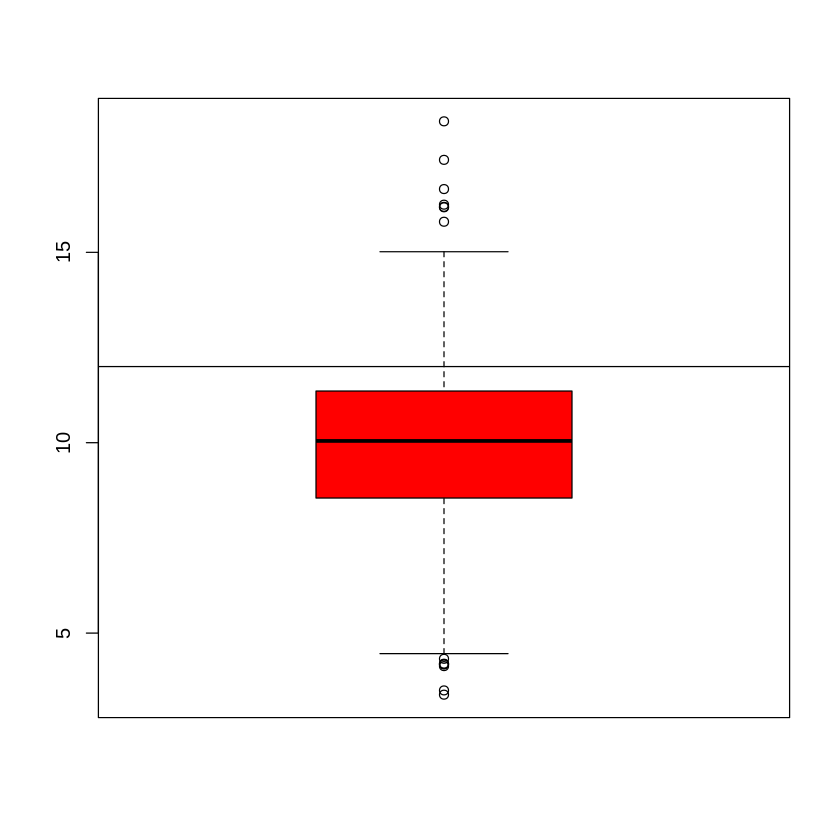

In [87]:
boxplot(avgpm25$pm25, col='red')
abline(h=12)

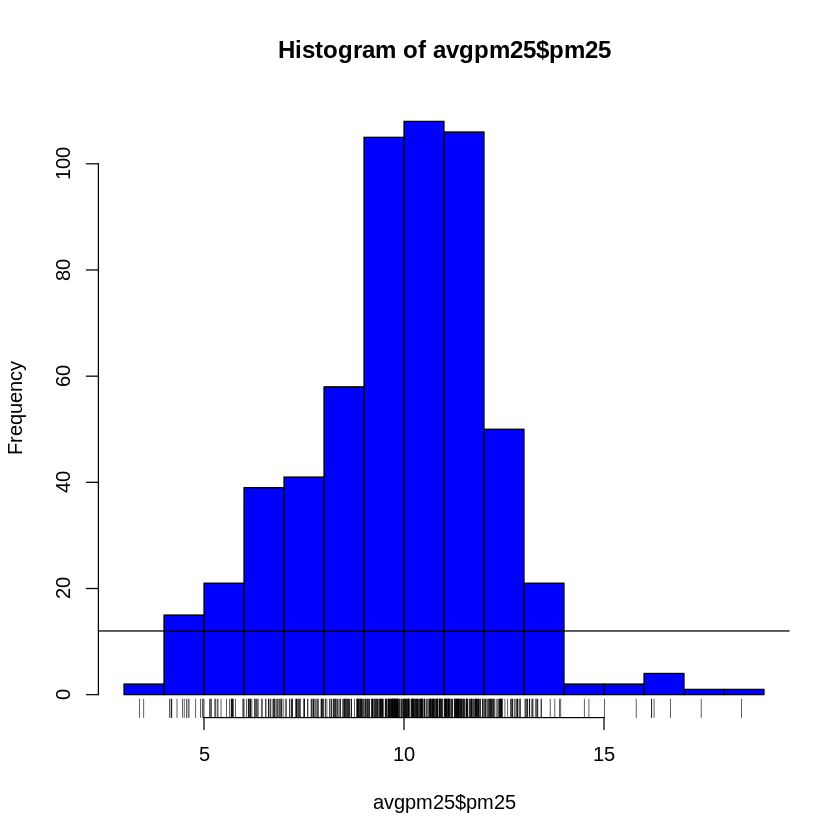

In [86]:
hist(avgpm25$pm25,col='blue')
rug(avgpm25$pm25)

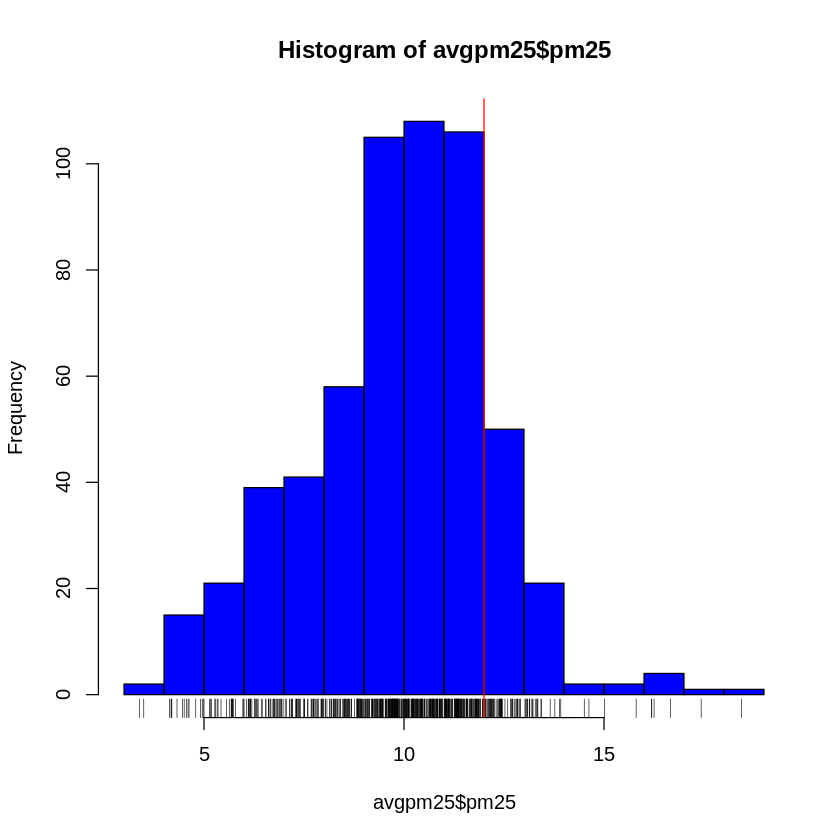

In [85]:
hist(avgpm25$pm25,col='blue')
rug(avgpm25$pm25)
abline(v=12, col='red')


east west 
 442  134 

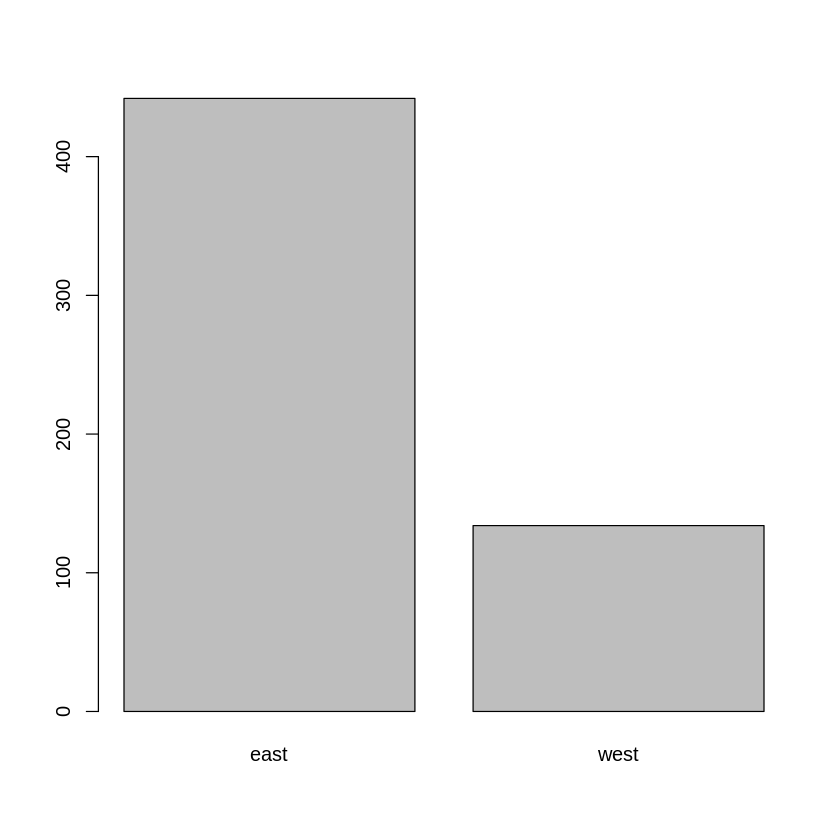

In [89]:
barplot(table(avgpm25$region))
table(avgpm25$region)


          cd domesticated           en           lc           nt           vu 
           2           10            4           27            4            7 

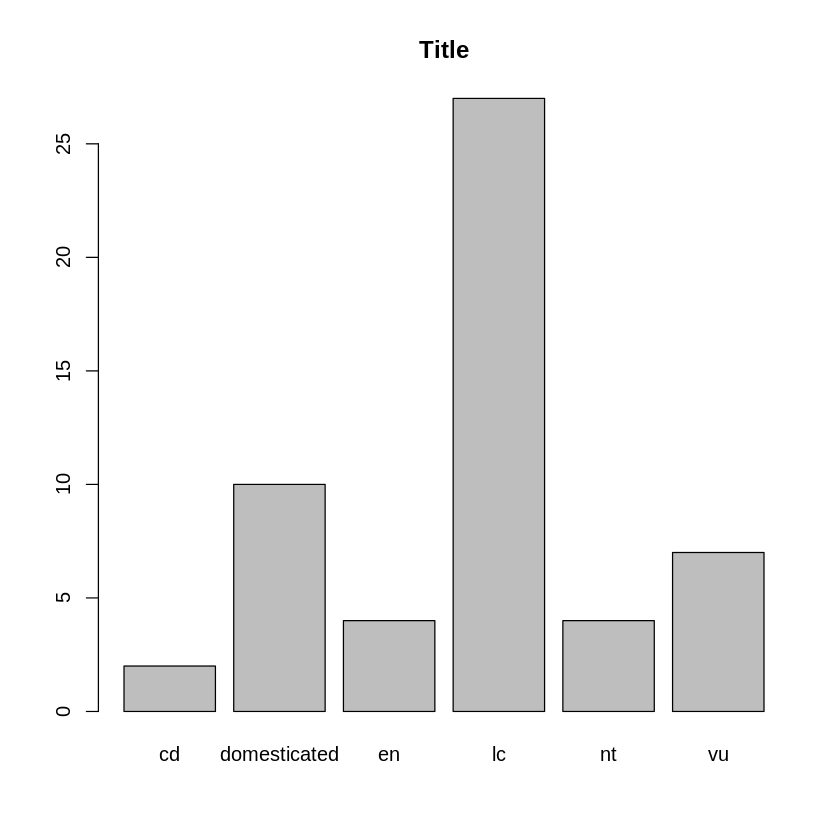

In [92]:
barplot(table(msleep$conservation), main="Title")
table(msleep$conservation)